
#Assignment No 4c
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

##TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

##Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

##Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [3]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


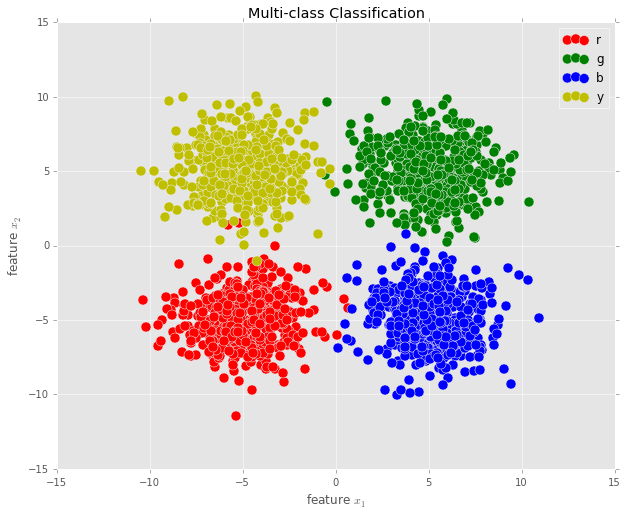

In [4]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/4,1)),2*np.ones((nexamples/4,1)),3*np.ones((nexamples/4,1)),4*np.ones((nexamples/4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples/4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples/4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples/4,1)),2*np.ones((ntexamples/4,1)),3*np.ones((ntexamples/4,1)),4*np.ones((ntexamples/4,1))))


In [5]:
import randomForest as rf

In [6]:
rfc=rf.RandomForest(weaklearner='Linear')

In [7]:
print X.shape, Y.shape

(2000, 2) (2000, 1)


In [16]:
%pdb
rfc.train(X,Y)

Automatic pdb calling has been turned OFF
Creating Left Child Node With 997 Examples, and Right Node with 1003 Examples
Creating Left Child Node With 496 Examples, and Right Node with 501 Examples
Creating Left Child Node With 299 Examples, and Right Node with 197 Examples
Creating Left Child Node With 299 Examples, and Right Node with 0 Examples
Creating Child Node With ClassLabel=1.0, nexamples=299, classes=[(1.0, 299)]
Creating Left Child Node With 4 Examples, and Right Node with 193 Examples
Creating Child Node With ClassLabel=1.0, nexamples=4, classes=[(1.0, 3), (4.0, 1)]
Creating Child Node With ClassLabel=1.0, nexamples=193, classes=[(1.0, 193)]
Creating Left Child Node With 29 Examples, and Right Node with 472 Examples
Creating Left Child Node With 20 Examples, and Right Node with 9 Examples
Creating Child Node With ClassLabel=3.0, nexamples=20, classes=[(1.0, 2), (3.0, 18)]
Creating Child Node With ClassLabel=3.0, nexamples=9, classes=[(3.0, 9)]
Creating Left Child Node With 4

In [17]:
len(rfc.trees)

10

In [22]:
%pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

Automatic pdb calling has been turned OFF
(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,495,0,2,3,500
2.0,0,498,0,2,500
3.0,0,1,499,0,500
4.0,1,0,0,499,500
All,496,499,501,504,2000


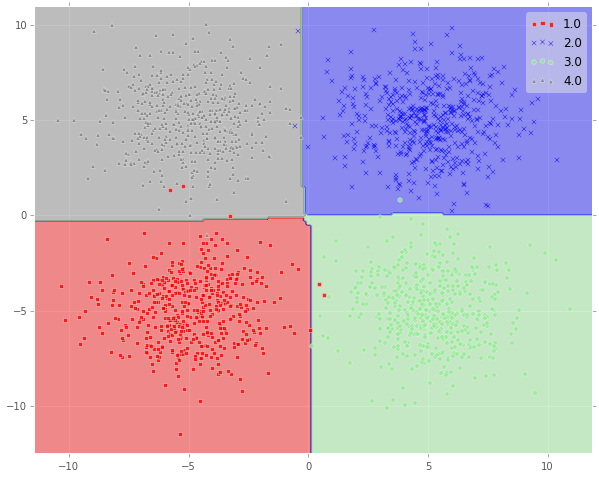

In [36]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [25]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Yt)

(2000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,249,0,0,1,250
2.0,0,250,0,0,250
3.0,1,1,248,0,250
4.0,1,1,0,248,250
All,251,252,248,249,1000


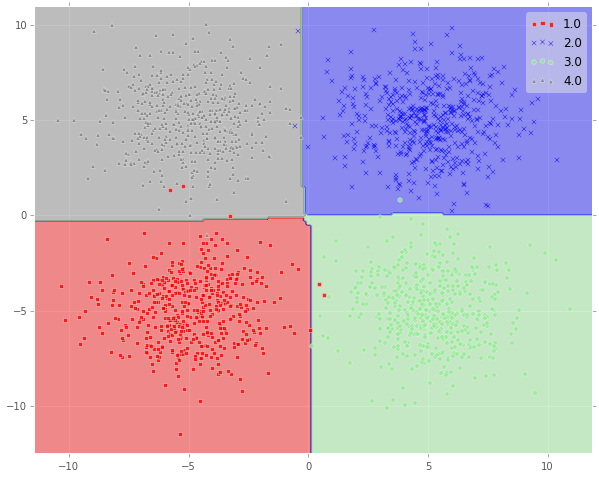

In [35]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

Automatic pdb calling has been turned OFF
(10000, 2)
[1.0, 2.0, 3.0, 4.0]


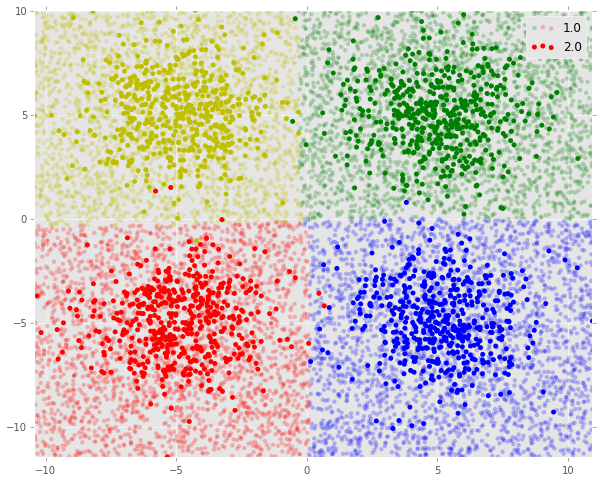

In [32]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
%pdb
t.plot_points_range(rfc,X,Y,10000)

###Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

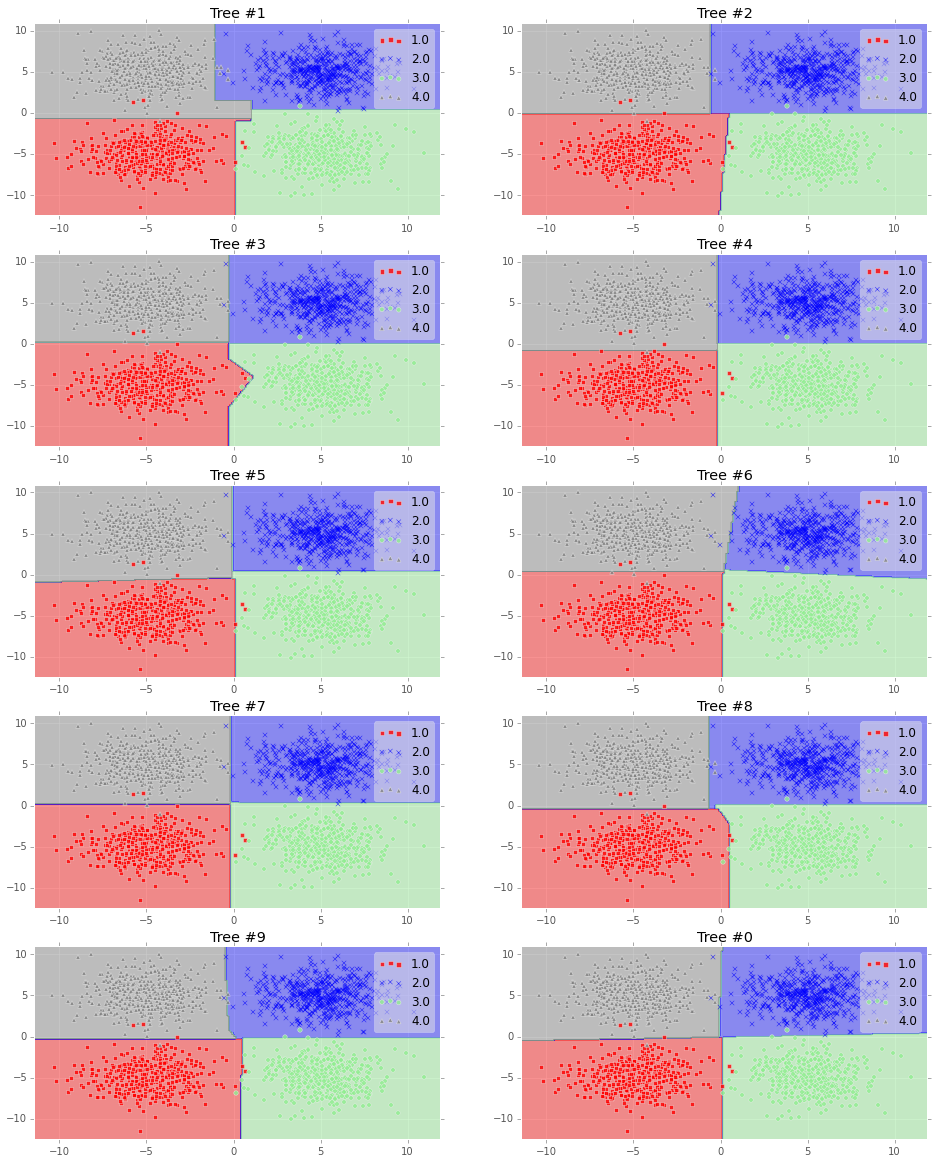

In [34]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

####What Can You conclude

##Lets Run on Nonlinear Data, The Spherical Examples...

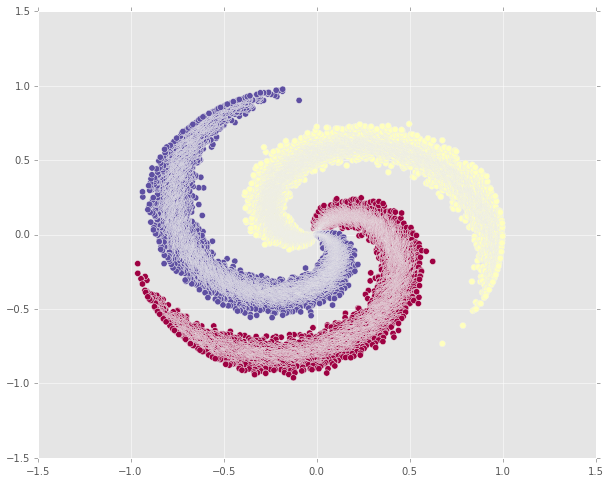

In [37]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [40]:
print X.shape, Y.shape

(30000, 2) (30000,)


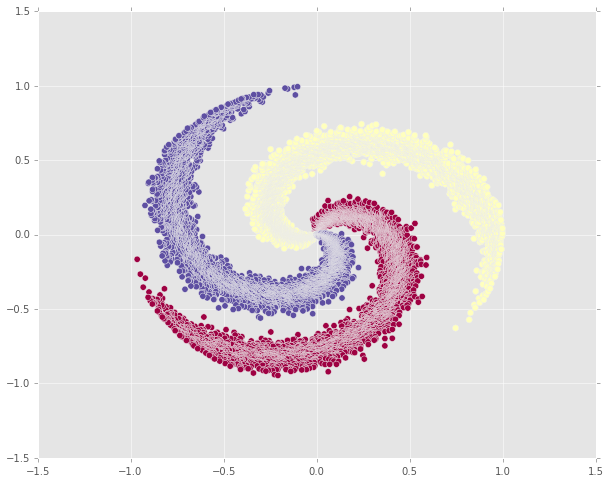

In [38]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [47]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])

Creating Left Child Node With 24659 Examples, and Right Node with 5341 Examples
Creating Left Child Node With 15963 Examples, and Right Node with 8696 Examples
Creating Left Child Node With 7416 Examples, and Right Node with 8547 Examples
Creating Left Child Node With 842 Examples, and Right Node with 6574 Examples
Creating Child Node With ClassLabel=1, nexamples=842, classes=[(1, 842)]
Creating Child Node With ClassLabel=0, nexamples=6574, classes=[(0, 2677), (1, 2328), (2, 1569)]
Creating Left Child Node With 3617 Examples, and Right Node with 4930 Examples
Creating Child Node With ClassLabel=0, nexamples=3617, classes=[(0, 1881), (1, 1736)]
Creating Child Node With ClassLabel=1, nexamples=4930, classes=[(1, 4856), (2, 74)]
Creating Left Child Node With 5271 Examples, and Right Node with 3425 Examples
Creating Left Child Node With 4010 Examples, and Right Node with 1261 Examples
Creating Child Node With ClassLabel=2, nexamples=4010, classes=[(0, 4), (2, 4006)]
Creating Child Node Wit

In [48]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print Y.shape, len(Yp)
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,9899,7,94,10000
1,113,9886,1,10000
2,277,5,9718,10000
All,10289,9898,9813,30000


In [49]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print Y.shape, len(Ypt)
t.print_confusion_matrix(Ypt,Ytest)

(30000,) 15000


Predicted,0.0,1.0,2.0,All
Actual,,,,
0,4946,7,47,5000
1,54,4946,0,5000
2,133,5,4862,5000
All,5133,4958,4909,15000


(10000, 2)
[0.0, 1.0, 2.0]


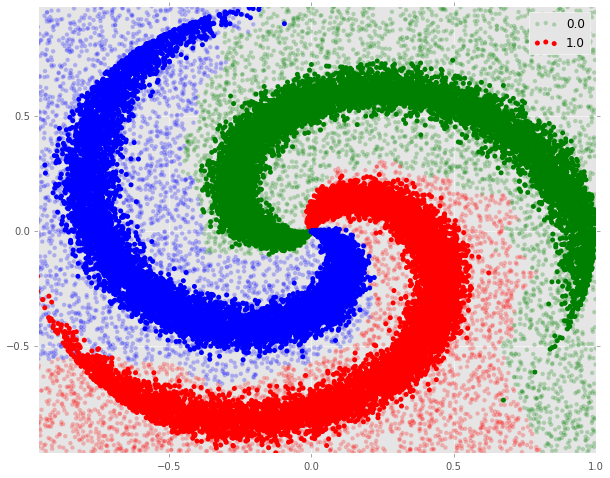

In [50]:
t.plot_points_range(rfc,X,Y)

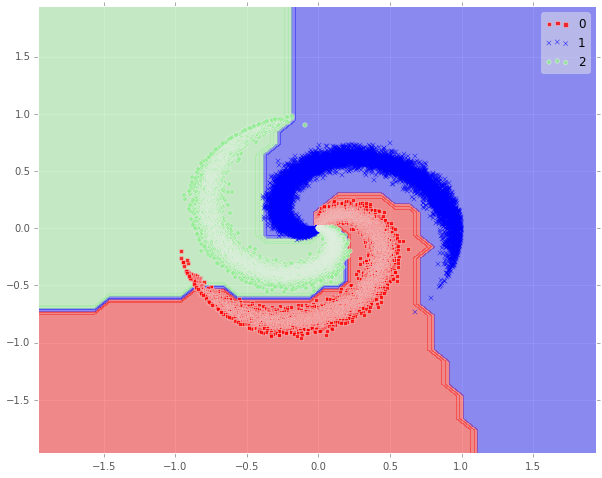

In [51]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

###Lets Plot Per-Tree Decision Boundary

<function matplotlib.pyplot.tight_layout>

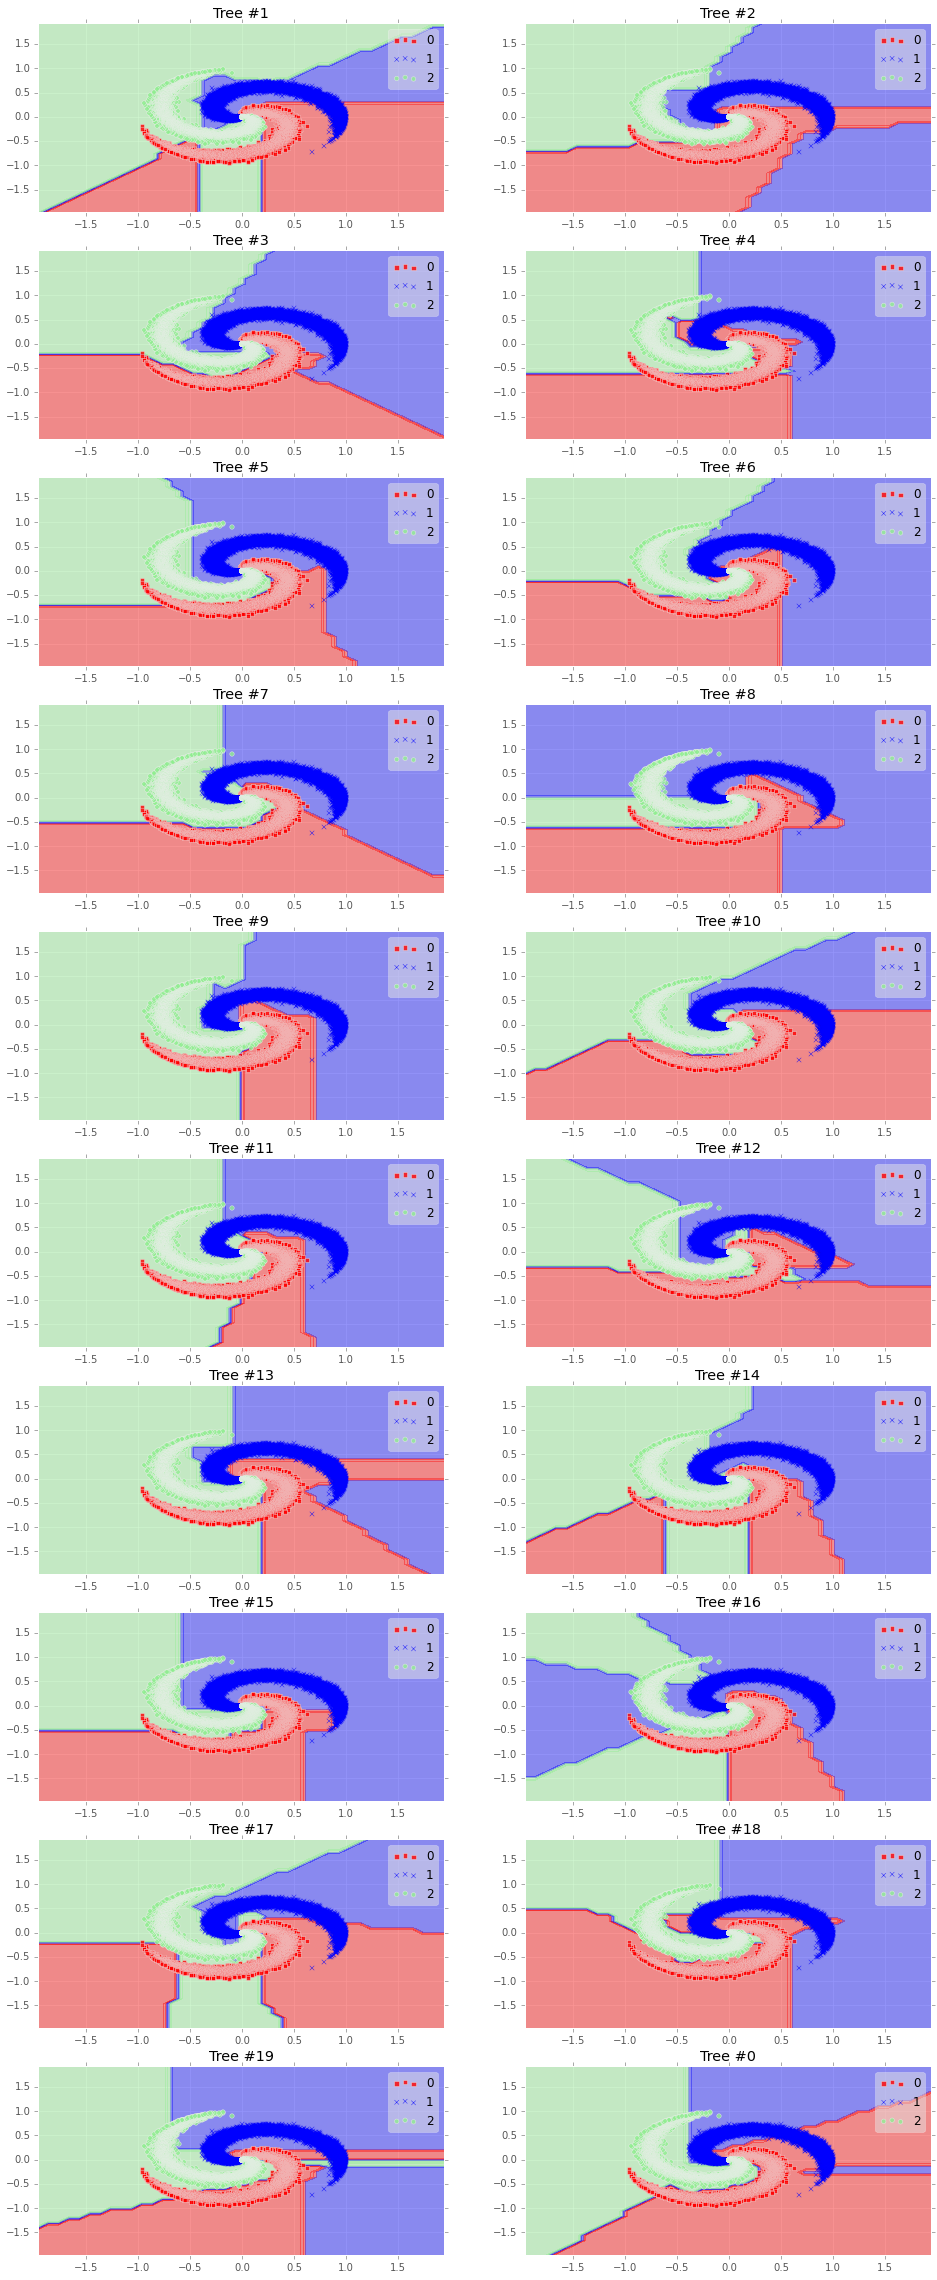

In [53]:
ntrees=rfc.ntrees
nrows=ntrees/2
ncols=2
i=0
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

##TODO: Find Optimal Number of Trees for this data set, using cross validation...